### Student Information
Name:黃莉雯

Student ID:111034532

GitHub ID:liwen0217

Kaggle name:Carrie

Kaggle private scoreboard snapshot:

![Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

# Data Mining Lab 2

## Load data

In [2]:
import pandas as pd

### training data
anger_train = pd.read_csv("../data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("../data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("../data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("../data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [3]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [4]:
### testing data
anger_test = pd.read_csv("../data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("../data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("../data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("../data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [5]:
# shuffle dataset
train_df = train_df.sample(frac=1) #frac: what how many propotion of raw data
test_df = test_df.sample(frac=1)

In [6]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


## **>>> Exercise 1 (Take home):**

In [7]:
import helpers.data_mining_helpers as dmh
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\carrie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[Text(0, 0, 'just'),
 Text(1, 0, 'like'),
 Text(2, 0, 'amp'),
 Text(3, 0, 'people'),
 Text(4, 0, 'time'),
 Text(5, 0, 'day'),
 Text(6, 0, 'know'),
 Text(7, 0, 'love'),
 Text(8, 0, 'good'),
 Text(9, 0, 'did'),
 Text(10, 0, 'watch'),
 Text(11, 0, 'think'),
 Text(12, 0, 'ca'),
 Text(13, 0, 'got'),
 Text(14, 0, 'make'),
 Text(15, 0, 've'),
 Text(16, 0, 'today'),
 Text(17, 0, 'happy'),
 Text(18, 0, 'want'),
 Text(19, 0, 'lost'),
 Text(20, 0, 'live'),
 Text(21, 0, 'life'),
 Text(22, 0, 'really'),
 Text(23, 0, 'need'),
 Text(24, 0, 'll'),
 Text(25, 0, 'feel'),
 Text(26, 0, 'let'),
 Text(27, 0, 'way'),
 Text(28, 0, 'amazing'),
 Text(29, 0, 'going')]

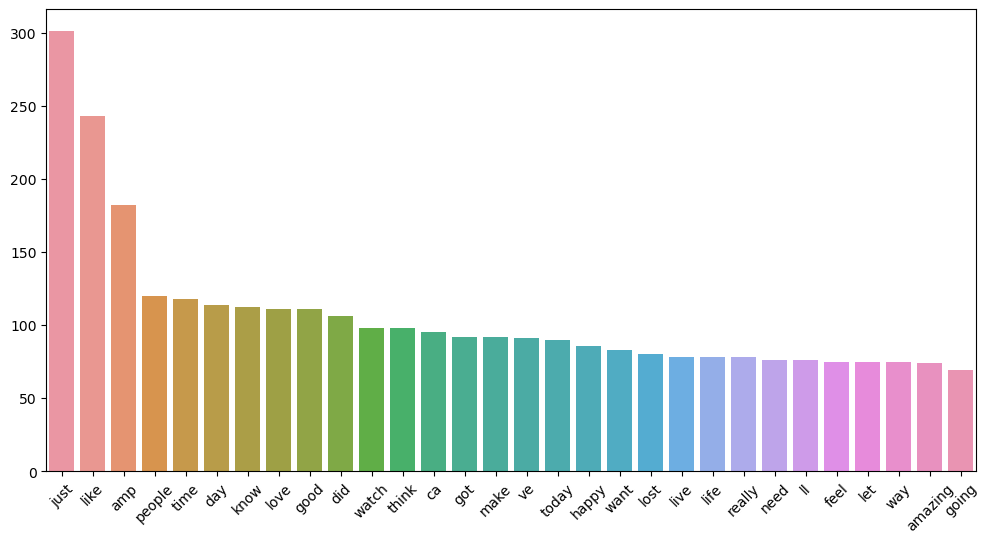

In [8]:
nltk.download('punkt')
train_df['unigrams'] = train_df['text'].apply(lambda x: dmh.tokenize_text(x))
unigrams_list = [' '.join(unigram) for unigram in train_df.unigrams]
count_vect = CountVectorizer(stop_words='english') #use parameter to recognize english stop words
train_df_counts = count_vect.fit_transform(unigrams_list) #get the sparse matrix

word_list = ["term_"+str(i) for i in count_vect.get_feature_names_out()]
doc_list = ["doc_"+ str(i) for i in list(train_df.index)]

data_TF = []
for j in range(0,train_df_counts.shape[1]):
    data_TF.append(sum(train_df_counts[:,j].toarray())) 
data_TF = np.asarray(train_df_counts.sum(axis=0))[0]  #get word frequency list

sorted_indices = np.argsort(data_TF)[::-1] #sort by word frequency

plt.figure(figsize=(12, 6))
g = sns.barplot(x=count_vect.get_feature_names_out()[sorted_indices][:30], 
            y=data_TF[sorted_indices][:30])
g.set_xticklabels(count_vect.get_feature_names_out()[sorted_indices][:30], rotation = 45)

## BOW

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

C:\Users\carrie\Anaconda\envs\py38\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

## **>>> Exercise 2 (Take home):**

In [10]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDF_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
TFIDF_1000.fit(train_df['text'])

train_data_TFIDF_features_1000 = TFIDF_1000.transform(train_df['text'])

## check dimension
train_data_TFIDF_features_1000.shape

(3613, 1000)

In [11]:
TFIDF_1000.get_feature_names_out()[100:110]

array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

## Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [13]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['joy', 'anger', 'joy', 'joy', 'fear', 'joy', 'sadness', 'sadness',
       'fear', 'joy'], dtype=object)

In [14]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.99
testing accuracy: 0.68


In [15]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [16]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [17]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

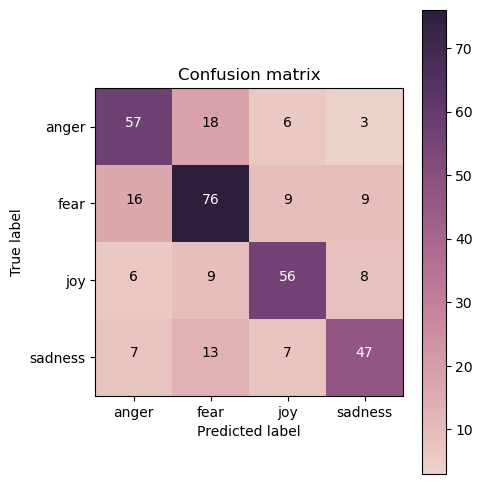

In [18]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

##  **>>> Exercise 3 (Take home):**

由confusion matrix可以看出，每一種情緒的testing data，模型能預測到至少8成

但或多或少都有預測錯誤的部分，可能是文字的表達方式比較不同...等原因導致

單看confusion matrix的數字可能會覺得 fear 答對的數字最多(76)

但其實 fear 在training data跟 testing data 都是資料最多的情緒

搭配precision, recall, f1-score 去觀察，會發現其實是 joy 類的表現較好

## **>>> Exercise 4 (Take home):**

In [19]:
# Answer here
from sklearn.naive_bayes import BernoulliNB
NB_model = BernoulliNB()

NB_model = NB_model.fit(X_train, y_train)

## predict!
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['joy', 'anger', 'joy', 'joy', 'fear', 'joy', 'anger', 'sadness',
       'anger', 'joy'], dtype='<U7')

In [20]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.79
testing accuracy: 0.7


In [21]:
print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.61      0.68      0.64        84
        fear       0.74      0.76      0.75       110
         joy       0.81      0.68      0.74        79
     sadness       0.66      0.65      0.65        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.70       347
weighted avg       0.71      0.70      0.70       347



In [22]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 13  5  9]
 [15 84  3  8]
 [10  7 54  8]
 [11 10  5 48]]


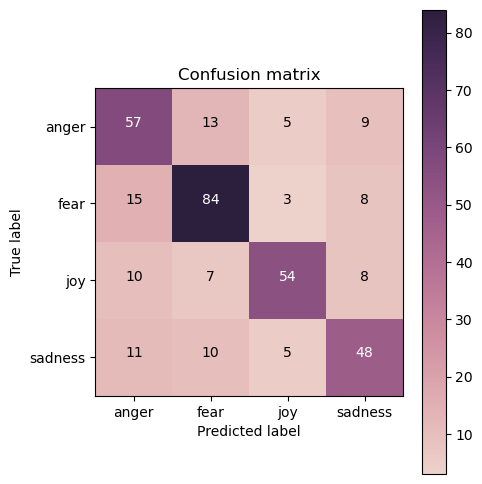

In [23]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

## **>>> Exercise 5 (Take home):**

觀察兩個模型的混淆矩陣，可以看出 NB 的準確率較高

而在 NB 的預測結果，anger, fear, sadness 這三個負面情緒，被判斷為 joy 的數量也減少

所以我個人的意見認為，NB_model優於DT_model


另一方面從模型在 training data 跟 testing data 的 accuracy 觀察

DT:  training accuracy: 0.99; testing accuracy: 0.68

NB:  training accuracy: 0.79; testing accuracy: 0.70

可以判斷 DT 可能有點 overfitting，在遇到與訓練資料較相似的資料，能表現比較好

雖然目前看起來是 NB 的表現較好，但 training accuracy僅0.79，可能模型訓練的還不足夠

## Deep Learning

In [24]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

##input dimension will be 500 neurons

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [25]:
## deal with label (string -> one-hot)
## the emotion (ylabel) was string, which is model can not receive
## four-dimension label, each dimension symbols one emotion
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 1873       fear
1377       fear
3093    sadness
895        fear
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [26]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

#between each of layers, there's an activate function (like ReLU or softmax)
#activate functions make our linear transformation of each neuron into nun-linear transformation
#predict curve (let prediction more flexible)

input_shape:  500
output_shape:  4


In [27]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)           (None, 4)                 0     

In [28]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('../logs/training_log.csv')

# training setting
epochs = 25 #train same data 25 times
batch_size = 32 #average loss between 32 datas

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 [==============================] - 1s 2ms/step - loss: 1.3315 - accuracy: 0.3595 - val_loss: 1.2745 - val_accuracy: 0.4150
Epoch 2/25
113/113 [==============================] - 0s 953us/step - loss: 1.0003 - accuracy: 0.6424 - val_loss: 0.9542 - val_accuracy: 0.6398
Epoch 3/25
113/113 [==============================] - 0s 1ms/step - loss: 0.5888 - accuracy: 0.7924 - val_loss: 0.8247 - val_accuracy: 0.6801
Epoch 4/25
113/113 [==============================] - 0s 1ms/step - loss: 0.4272 - accuracy: 0.8395 - val_loss: 0.7901 - val_accuracy: 0.7089
Epoch 5/25
113/113 [==============================] - 0s 1ms/step - loss: 0.3324 - accuracy: 0.8749 - val_loss: 0.8268 - val_accuracy: 0.6888
Epoch 6/25
113/113 [==============================] - 0s 946us/step - loss: 0.2722 - accuracy: 0.9020 - val_loss: 0.8914 - val_accuracy: 0.6744
Epoch 7/25
113/113 [==============================] - 0s 1ms/step - loss: 0.2296 - accuracy: 0.9200 - val_loss: 0.9522 - val_accuracy: 0.6715
Ep

In [29]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 [==============================] - 0s 2ms/step


array([[1.1670420e-06, 1.9303970e-05, 9.9997818e-01, 1.3353317e-06],
       [9.9994314e-01, 1.0748545e-05, 2.4560912e-08, 4.6149034e-05],
       [3.0066033e-03, 4.1814410e-04, 8.7522316e-01, 1.2135201e-01],
       [1.2596796e-06, 3.7552114e-04, 9.9962306e-01, 8.5466120e-08],
       [2.7582072e-09, 1.0000000e+00, 3.2935257e-09, 3.8273562e-08]],
      dtype=float32)

In [30]:
from sklearn.metrics import accuracy_score
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.68


In [31]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("../logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.359535,1.331455,0.414986,1.274451
1,1,0.642402,1.000273,0.639769,0.954206
2,2,0.792416,0.588798,0.680115,0.824750
3,3,0.839469,0.427183,0.708934,0.790084
4,4,0.874896,0.332446,0.688761,0.826804
5,5,0.902020,0.272195,0.674352,0.891380
6,6,0.920011,0.229556,0.671470,0.952180
7,7,0.942984,0.189118,0.668588,0.994970
8,8,0.950180,0.159845,0.685879,1.022105
9,9,0.959314,0.138105,0.680115,1.122582


## **>>> Exercise 6 (Take home):**

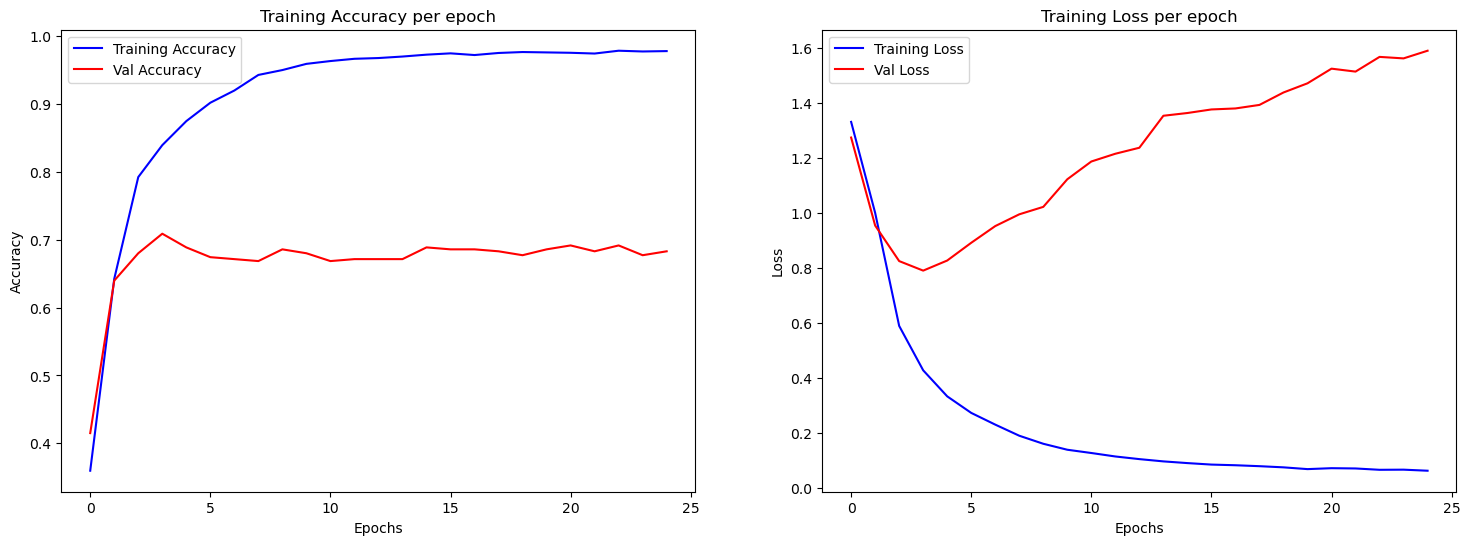

In [32]:
# Answer here
'''
觀察下面兩張圖，可以發現Training Accuracy很高，趨近於1，且Training Loss很低。
但是Validation的Accuracy沒有明顯進步，Loss雖一度下降，但後面又持續升高
可以判斷模型現在是Overfitting的狀態，將Training Data記住了，但無法預測其他資料
'''
plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)
plt.plot(training_log['epoch'], training_log['accuracy'], color='blue')
plt.plot(training_log['epoch'], training_log['val_accuracy'], color='red')
plt.title("Training Accuracy per epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training Accuracy","Val Accuracy"],loc=2)

plt.subplot(1, 2, 2)
plt.plot(training_log['epoch'], training_log['loss'], color='blue')
plt.plot(training_log['epoch'], training_log['val_loss'], color='red')
plt.title("Training Loss per epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Training Loss","Val Loss"],loc=2)

plt.show()

## Word2Vec

In [33]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
1873,21016,@residentadvisor thanks for getting back to me...,"[@, residentadvisor, thanks, for, getting, bac..."
1377,20520,@CBCNews Canada should be a driving force of d...,"[@, CBCNews, Canada, should, be, a, driving, f..."
3093,40266,@stevesingiser @POLITICO_Steve Put a damper on...,"[@, stevesingiser, @, POLITICO_Steve, Put, a, ..."
895,20038,#WeirdWednesday OKAY! That jump-scared the #Po...,"[#, WeirdWednesday, OKAY, !, That, jump-scared..."
480,10480,"I don't mean to offend anyone, but 93.7 litera...","[I, do, n't, mean, to, offend, anyone, ,, but,..."


In [35]:
training_corpus = train_df['text_tokenized'].values

In [36]:
from gensim.models import Word2Vec

## setting
vector_dim = 100 #use how many dimension to represent a word
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

In [37]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.26019675,  0.7286547 ,  0.05416215, -0.112077  , -0.11255804,
       -0.78299534,  0.9582538 ,  1.1465322 , -0.37704125, -0.22341923,
       -0.19278269, -0.6952094 , -0.4550294 ,  0.45523196, -0.03499052,
       -0.581201  ,  0.12294808, -0.80877805,  0.28544915, -0.8695726 ,
        0.69697326,  0.96732783,  0.5156358 ,  0.30177993,  0.56839335,
       -0.05463604, -0.7863083 ,  0.10904831, -0.31085682,  0.22700137,
        0.34961933, -0.31815508,  0.06558274, -0.7385816 , -0.07076994,
        0.603994  ,  0.5309074 , -0.08469373, -0.36133823, -0.4108426 ,
       -0.19765654, -0.2919232 , -0.7333702 , -0.33492464,  0.42550656,
       -0.16456354, -1.1371695 ,  0.6187222 ,  0.5804228 ,  0.61902094,
        0.18717137, -0.8940319 ,  0.04874766, -0.0353523 , -0.2511068 ,
       -0.0544617 ,  0.0357795 ,  0.10017031,  0.0175082 ,  0.28680223,
       -0.04913405, -0.54579955,  0.8234499 ,  0.2694007 , -0.48833072,
        0.4693777 ,  0.34084728,  0.6640536 , -1.0394063 ,  0.46

In [38]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.6272379159927368),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665882110596)]

## **>>> Exercise 7 (Take home):**

In [39]:
print("110", train_df['emotion'][110], train_df['text_tokenized'][110])
print("150", train_df['emotion'][150], train_df['text_tokenized'][150])
print("959", train_df['emotion'][959], train_df['text_tokenized'][959])
print("2179", train_df['emotion'][2179], train_df['text_tokenized'][2179])

110 anger ['@', 'jennylhowe', 'I', 'am', 'angry', 'at', 'the', 'student', 'for', 'being', 'a', 'racist', ',', 'and', 'the', 'teacher', 'for', 'not', 'stopping', 'it', ',', 'and', 'at', 'the', 'class', 'for', 'letting', 'it', 'go', 'by', '.']
150 anger ['straight', 'people', 'are', 'canoodling', 'on', 'the', 'quad', 'and', 'I', "'m", '#', 'offended']
959 fear ['I', 'dread', 'this', 'drive', 'every', 'Wednesday', '😩']
2179 joy ['There', 'is', 'something', 'v', 'satisfying', 'about', 'opening', 'an', 'old', "'to", "do'.doc", 'file', 'and', 'being', 'able', 'to', 'check', 'off', 'all', 'the', 'things', 'you', 'have', 'done', '#', 'smiling']


In [41]:
sentence_vecs_110 = [word2vec_model.wv[word] for word in train_df['text_tokenized'][110]]
average_vector_110 = np.mean(sentence_vecs_110, axis=0)
sentence_vecs_150 = [word2vec_model.wv[word] for word in train_df['text_tokenized'][150]]
average_vector_150 = np.mean(sentence_vecs_150, axis=0)
sentence_vecs_959 = [word2vec_model.wv[word] for word in train_df['text_tokenized'][959]]
average_vector_959 = np.mean(sentence_vecs_959, axis=0)
sentence_vecs_2179 = [word2vec_model.wv[word] for word in train_df['text_tokenized'][2179]]
average_vector_2179 = np.mean(sentence_vecs_2179, axis=0)

In [42]:
from numpy.linalg import norm
def cosine_similarity(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    norm_vector1 = norm(vector1)
    norm_vector2 = norm(vector2)

    similarity = dot_product / (norm_vector1 * norm_vector2)

    return similarity

In [43]:
print("Word2Vec Model")
print("between angry and angry:", cosine_similarity(average_vector_110, average_vector_150))
print("between angry and fear :", cosine_similarity(average_vector_110, average_vector_959))
print("between angry and joy :", cosine_similarity(average_vector_110, average_vector_2179))

Word2Vec Model
between angry and angry: 0.96873134
between angry and fear : 0.92553425
between angry and joy : 0.9758671


In [44]:
average_vector_110 = w2v_google_model.get_mean_vector(train_df['text_tokenized'][110])
average_vector_150 = w2v_google_model.get_mean_vector(train_df['text_tokenized'][150])
average_vector_959 = w2v_google_model.get_mean_vector(train_df['text_tokenized'][959])
average_vector_2127 = w2v_google_model.get_mean_vector(train_df['text_tokenized'][2127])
average_vector_2179 = w2v_google_model.get_mean_vector(train_df['text_tokenized'][2179])
print("Google Model")
print("between angry and angry:", cosine_similarity(average_vector_110, average_vector_150))
print("between angry and fear:", cosine_similarity(average_vector_110, average_vector_959))
print("between angry and joy:", cosine_similarity(average_vector_110, average_vector_2179))

Google Model
between angry and angry: 0.74216914
between angry and fear: 0.69943017
between angry and joy: 0.80984634


In [40]:
'''
查詢到可以使用平均的方式，但看起來效果並不穩定，我們舉出的例子angry跟angry的相似度低於angry跟happy的相似度
不過同樣的句子使用google model得到的結果也是一樣的，所以可能平均的方法不是個好方法
'''

'\n查詢到可以使用平均的方式，但看起來效果並不穩定，我們舉出的例子angry跟angry的相似度低於angry跟happy的相似度\n不過同樣的句子使用google model得到的結果也是一樣的，所以可能平均的方法不是個好方法\n'

## High-dimension Visualization: t-SNE

## **>>> Exercise 8 (Take home):**

### google model

In [45]:
# Answer here
word_list = ['angry', 'happy', 'sad', 'fear']
topn = 14
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = angry_words + happy_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

# print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier']
happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried']

target words: 
['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'happy', 'glad', 'plea

(360, 300)


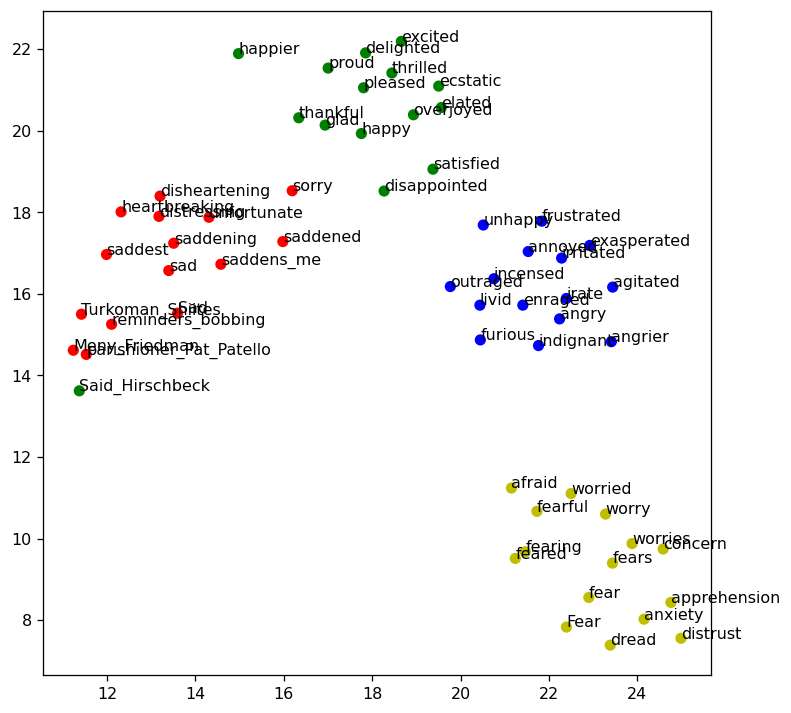

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 300
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]
print(X_train.shape) #(words, dimension)


## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5,7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

### twitter model

In [53]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

load ok


In [55]:
# Answer here
word_list = ['angry', 'happy', 'sad', 'fear']
topn = 14
angry_words = ['angry'] + [word_ for word_, sim_ in glove_twitter_25_model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [word_ for word_, sim_ in glove_twitter_25_model.most_similar('happy', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in glove_twitter_25_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in glove_twitter_25_model.most_similar('fear', topn=topn)]        

print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = angry_words + happy_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

# print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

angry_words:  ['angry', 'stupid', 'hate', 'annoying', 'weird', 'like', 'confused', 'fucking', 'people', 'dislike', 'awkward', 'reason', 'because', 'scary', 'seriously']
happy_words:  ['happy', 'birthday', 'thank', 'welcome', 'love', 'miss', 'hello', 'thanks', 'merry', 'bless', 'wish', 'day', 'dear', 'morning', 'good']
sad_words:  ['sad', 'swear', 'feel', 'same', 'wrong', 'meant', 'true', 'reason', 'remember', 'i', 'know', 'bad', 'thought', 'think', 'but']
fear_words:  ['fear', 'anger', 'enemy', 'afraid', 'destroy', 'fears', 'lies', 'faith', 'hatred', 'overcome', 'truth', 'promises', 'enemies', 'minds', 'suffer']

target words: 
['angry', 'stupid', 'hate', 'annoying', 'weird', 'like', 'confused', 'fucking', 'people', 'dislike', 'awkward', 'reason', 'because', 'scary', 'seriously', 'happy', 'birthday', 'thank', 'welcome', 'love', 'miss', 'hello', 'thanks', 'merry', 'bless', 'wish', 'day', 'dear', 'morning', 'good', 'sad', 'swear', 'feel', 'same', 'wrong', 'meant', 'true', 'reason', 'reme

(360, 25)


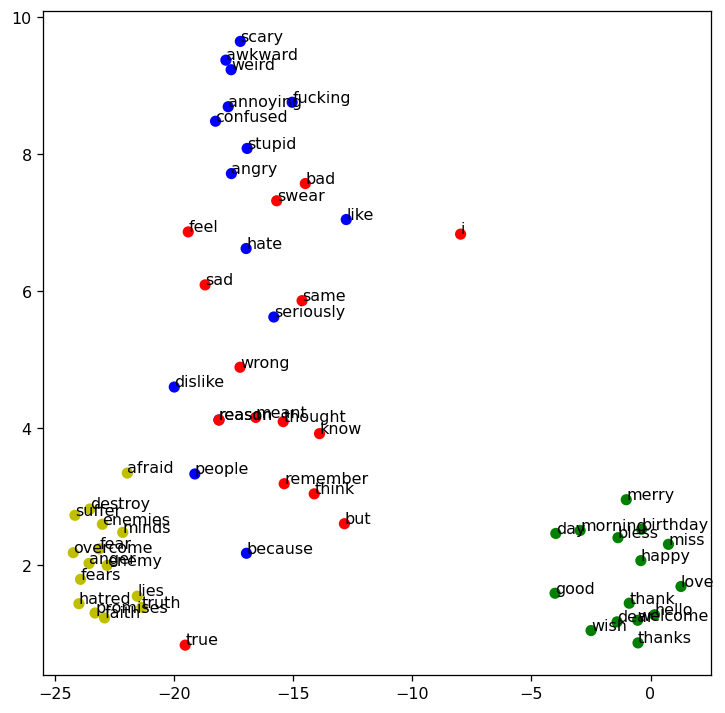

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = glove_twitter_25_model

## prepare training word vectors
size = 300
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]
print(X_train.shape) #(words, dimension)


## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5,7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

### Answer Here

In [59]:
'''
觀察由Google產生詞彙及訓練模型的圖片，黃色(fear) 分得比較開，而 綠色(happy) 跟 紅色(sad) 有部分重疊，
不一定是分群做得不好，因為可以看到在 happy_list 裡面出現 disspointed 這種負面情緒的字，或出現 Said_Hirschbeck 這種人名，
可能有些詞彙讓模型難以判斷。

而twitter產生詞彙及訓練模型的圖片，綠色(happy) 跟 黃色(fear) 都有蠻明顯的群集，
藍色(angry) 跟 紅色(sad) 則是有部分重疊，例如：feel, same, think, because 這種沒有明顯情緒的字
或是 dislike, bad 這種可以表示 angry 也可以表示 sad 的字
'''

'\n觀察由Google產生詞彙及訓練模型的圖片，黃色(fear) 分得比較開，而 綠色(happy) 跟 紅色(sad) 有部分重疊，\n不一定是分群做得不好，因為可以看到在 happy_list 裡面出現 disspointed 這種負面情緒的字，或出現 Said_Hirschbeck 這種人名，\n可能有些詞彙讓模型難以判斷。\n\n而twitter產生詞彙及訓練模型的圖片，綠色(happy) 跟 黃色(fear) 都有蠻明顯的群集，\n藍色(angry) 跟 紅色(sad) 則是有部分重疊，例如：feel, same, think, because 這種沒有明顯情緒的字\n或是 dislike, bad 這種可以表示 angry 也可以表示 sad 的字\n'

## Kaggle Competition

### Load Data

In [1]:
import pandas as pd
### training data

import json
#Read JSON objects from each line into a list
with open('tweets_DM.json', 'r') as file:
    json_df = [json.loads(line) for line in file]
    
identify_df = pd.read_csv("data_identification.csv")
emotion_df = pd.read_csv("emotion.csv")
submission = pd.read_csv("sampleSubmission.csv")

In [2]:
from pandas import json_normalize

# Convert JSON to DataFrame
df = json_normalize(json_df)

# Display the DataFrame
df.head()

,_score,_index,_crawldate,_type,_source.tweet.hashtags,_source.tweet.tweet_id,_source.tweet.text
0,391,hashtag_tweets,2015-05-23 11:42:47,tweets,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,433,hashtag_tweets,2016-01-28 04:52:09,tweets,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,232,hashtag_tweets,2017-12-25 04:39:20,tweets,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,376,hashtag_tweets,2016-01-24 23:53:05,tweets,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,989,hashtag_tweets,2016-01-08 17:18:59,tweets,[],0x2de201,"""Trust is not the same as faith. A friend is s..."


In [3]:
df = df.rename(columns={'_score': 'score',
                   '_index': 'index',
                   '_source.tweet.hashtags': 'hashtags',
                   '_source.tweet.tweet_id': 'tweet_id',
                   '_source.tweet.text': 'text',
                   '_crawldate': 'crawldate',
                   '_type': 'type'})

print(df.shape)
df.head()

(1867535, 7)


,score,index,crawldate,type,hashtags,tweet_id,text
0,391,hashtag_tweets,2015-05-23 11:42:47,tweets,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,433,hashtag_tweets,2016-01-28 04:52:09,tweets,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,232,hashtag_tweets,2017-12-25 04:39:20,tweets,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,376,hashtag_tweets,2016-01-24 23:53:05,tweets,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,989,hashtag_tweets,2016-01-08 17:18:59,tweets,[],0x2de201,"""Trust is not the same as faith. A friend is s..."


In [4]:
#index 跟 type 都是一樣的內容，所以將這兩個 column drop 掉
#認為 crawldate 不影響 emotion 的判斷，所以將他 drop 掉
df = df.drop(columns=["index","type","crawldate"])
df.head()

,score,hashtags,tweet_id,text
0,391,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,433,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,232,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,376,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,989,[],0x2de201,"""Trust is not the same as faith. A friend is s..."


In [5]:
print(identify_df.shape)
train_id_list = list(identify_df[identify_df['identification']=="train"].tweet_id)
test_id_list = list(identify_df[identify_df['identification']=="test"].tweet_id)
print(len(train_id_list))
print(len(test_id_list))

(1867535, 2)
1455563
411972


In [6]:
#區分 train_df 與 test_df
train_df = df[df["tweet_id"].isin(train_id_list)]
#將 train_df 與其 emotion 合併
train_df = pd.merge(train_df, emotion_df, on='tweet_id', how='inner')

test_df = df[df["tweet_id"].isin(test_id_list)]
print(test_df.shape)
print(train_df.shape)

train_df.head()

(411972, 4)
(1455563, 5)


,score,hashtags,tweet_id,text,emotion
0,391,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",anticipation
1,433,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",sadness
2,376,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,fear
3,120,"[authentic, LaughOutLoud]",0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,joy
4,1021,[],0x2c91a8,Still waiting on those supplies Liscus. <LH>,anticipation


In [7]:
test_df.head()

,score,hashtags,tweet_id,text
2,232,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
4,989,[],0x2de201,"""Trust is not the same as faith. A friend is s..."
9,66,"[materialism, money, possessions]",0x218443,When do you have enough ? When are you satisfi...
30,104,"[GodsPlan, GodsWork]",0x2939d5,"God woke you up, now chase the day #GodsPlan #..."
33,310,[],0x26289a,"In these tough times, who do YOU turn to as yo..."


In [8]:
del df
import gc
gc.collect()

0

In [9]:
import re
from nltk.corpus import stopwords
import nltk 

def preprocess_text(text):
    # 將文本轉換為小寫，較為統一
    text = text.lower()

    # 去除 stop words
    stop_words = set(stopwords.words('english'))
    text = re.sub(r'[!@#$%^&*()?0-9\+\-\,./:;<=>\\^_`{|}"~\[\]]', '', text)

    words = [word for word in text.split() if word not in stop_words]
    
    # 重組成句子
    text = ' '.join(words)
    return text

In [10]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger            39867
anticipation    248935
disgust         139101
fear             63999
joy             516017
sadness         193437
surprise         48729
trust           205478
Name: text, dtype: int64

In [12]:
# 將 hashtags 也加進 text 內容中
train_df['combined_text'] = train_df['hashtags'].apply(lambda x: ' '.join(x) if x else '') + ' ' + train_df['text']
train_df['text_new'] = train_df['combined_text'].apply(lambda x: preprocess_text(x))
train_df.head()

,score,hashtags,tweet_id,text,emotion,combined_text,text_new
0,391,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",anticipation,"Snapchat People who post ""add me on #Snapchat""...",snapchat people post add snapchat must dehydra...
1,433,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",sadness,freepress TrumpLegacy CNN @brianklaas As we se...,freepress trumplegacy cnn brianklaas see trump...
2,376,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,fear,Now ISSA is stalking Tasha 😂😂😂 <LH>,issa stalking tasha 😂😂😂 lh
3,120,"[authentic, LaughOutLoud]",0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,joy,authentic LaughOutLoud @RISKshow @TheKevinAlli...,authentic laughoutloud riskshow thekevinalliso...
4,1021,[],0x2c91a8,Still waiting on those supplies Liscus. <LH>,anticipation,Still waiting on those supplies Liscus. <LH>,still waiting supplies liscus lh


In [13]:
test_df['combined_text'] = test_df['hashtags'].apply(lambda x: ' '.join(x) if x else '') + ' ' + test_df['text']
test_df['text_new'] = test_df['combined_text'].apply(lambda x: preprocess_text(x))
test_df.head()

,score,hashtags,tweet_id,text,combined_text,text_new
2,232,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...","bibleverse Confident of your obedience, I writ...",bibleverse confident obedience write knowing e...
4,989,[],0x2de201,"""Trust is not the same as faith. A friend is s...","""Trust is not the same as faith. A friend is ...",trust faith friend someone trust putting faith...
9,66,"[materialism, money, possessions]",0x218443,When do you have enough ? When are you satisfi...,materialism money possessions When do you have...,materialism money possessions enough satisfied...
30,104,"[GodsPlan, GodsWork]",0x2939d5,"God woke you up, now chase the day #GodsPlan #...","GodsPlan GodsWork God woke you up, now chase t...",godsplan godswork god woke chase day godsplan ...
33,310,[],0x26289a,"In these tough times, who do YOU turn to as yo...","In these tough times, who do YOU turn to as y...",tough times turn symbol hope lh


In [14]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDF_5000 = TfidfVectorizer(max_features=5000, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
TFIDF_5000.fit(train_df['text_new'])

train_data_TFIDF_features_5000 = TFIDF_5000.transform(train_df['text_new'])

## check dimension
print(train_data_TFIDF_features_5000.shape)
train_data_TFIDF_features_5000[100:110]

C:\Users\carrie\Anaconda\envs\py38\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(1455563, 5000)


<10x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 61 stored elements in Compressed Sparse Row format>

In [15]:
# for a classificaiton problem, you need to provide both training & testing data
X_train = train_data_TFIDF_features_5000
y_train = train_df['emotion']

X_test = TFIDF_5000.transform(test_df['text_new'])

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)

X_train.shape:  (1455563, 5000)
y_train.shape:  (1455563,)
X_test.shape:  (411972, 5000)


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify = y_train)

In [17]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(random_state=42)
RF_model = RF_model.fit(X_train, y_train)

## predict!
y_val_pred = RF_model.predict(X_val)
y_test_pred = RF_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['anticipation', 'trust', 'sadness', 'joy', 'joy', 'sadness',
       'sadness', 'joy', 'anticipation', 'sadness'], dtype=object)

In [18]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_val, y_val_pred)
print("Accuracy:", accuracy)
from sklearn.metrics import classification_report

print(classification_report(y_true=y_val, y_pred=y_val_pred))

Accuracy: 0.5229756142803653
              precision    recall  f1-score   support

       anger       0.67      0.16      0.26      7973
anticipation       0.63      0.49      0.55     49787
     disgust       0.43      0.28      0.34     27820
        fear       0.68      0.32      0.44     12800
         joy       0.50      0.84      0.62    103204
     sadness       0.50      0.39      0.44     38687
    surprise       0.69      0.18      0.29      9746
       trust       0.60      0.26      0.36     41096

    accuracy                           0.52    291113
   macro avg       0.59      0.37      0.41    291113
weighted avg       0.55      0.52      0.49    291113



In [19]:
from collections import Counter
submit = pd.DataFrame({'id': test_df['tweet_id'], 'emotion':y_test_pred})
submit.to_csv("submition.csv",index=False)

In [20]:
submit

,id,emotion
2,0x28b412,anticipation
4,0x2de201,trust
9,0x218443,sadness
30,0x2939d5,joy
33,0x26289a,joy
...,...,...
1867525,0x2913b4,anticipation
1867529,0x2a980e,anticipation
1867530,0x316b80,sadness
1867531,0x29d0cb,joy
